In [15]:
import pandas as pd
import numpy as np
import matplotlib

In [35]:
test = pd.read_csv('../DrugCell/data/rcellminer_test.txt', sep='\t', header=None)
test_removed = pd.read_csv('../DrugCell/data/rcellminer_test_remove_negative_values.txt', sep='\t',header=None)
test_w_threshold = pd.read_csv('../DrugCell/data/rcellminer_test_set_threshold.txt', sep='\t', header=None)
original_test = pd.read_csv('../DrugCell/data/drugcell_test.txt', sep='\t', header=None)
original_train = pd.read_csv('../DrugCell/data/drugcell_train.txt', sep='\t', header=None)
o = pd.concat([
    test[2], 
#     test_removed[2], 
#     test_w_threshold[2], 
    original_train[2], 
    original_test[2]], 
    axis=1
).describe()
o.columns = [
    'rcellminer', 
#     'rcellminer wo/negative', 
#     'rcellminer w/threshold', 
    'DrugCell train', 
    'DrugCell test'
]

I tried to remove negative value and set the threshold to be the same with DrugCell's distribution.   
However, the correration is not so good, like 0.09.

In [40]:
len(test[0])

0       RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
1       RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
2       RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
3       RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
4       RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE
                           ...                     
1492                                   NCIH226_LUNG
1493                                   NCIH226_LUNG
1494                                   NCIH226_LUNG
1495                                   NCIH226_LUNG
1496                                   NCIH226_LUNG
Name: 0, Length: 1497, dtype: object

In [37]:
test

,0,1,2
0,RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,0.384631
1,RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CCC(=O)OCN1C(=O)C=CC1=O,1.493904
2,RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CC1=C(C(=O)C2=C(C1=O)N3C[C@H]4[C@@H]([C@@]3([C...,-0.982577
3,RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,C1=CC(=CC=C1CC2=CC=C(C=C2)[As](=O)(O)O)[As](=O...,1.237409
4,RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,C1=CC=C2C=C3C(=CC2=C1)NC(=N3)CNC4=CC=C(C=C4)C(...,-0.301961
...,...,...,...
1492,NCIH226_LUNG,COC1=NC(=NC2=C1N=CN2[C@H]3[C@H]([C@@H]([C@H](O...,-0.174699
1493,NCIH226_LUNG,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)/C=C/C...,1.915137
1494,NCIH226_LUNG,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@](C3[...,-0.019822
1495,NCIH226_LUNG,COC1=CC(=CC(=C1O)OC)[C@H]2[C@@H]3C(COC3=O)C(C4...,0.857176


<AxesSubplot:ylabel='Frequency'>

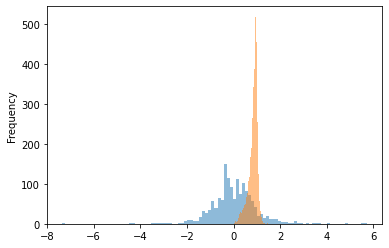

In [34]:
test[2].plot.hist(bins=100, alpha=0.5)
original_train[2].plot.hist(bins=100, alpha=0.5)
# original_test[2].plot.hist(bins=100, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

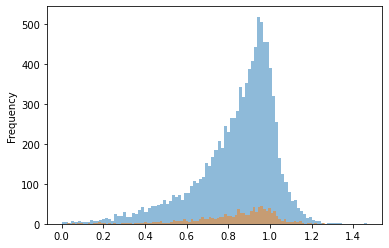

In [26]:
original_train[2].plot.hist(bins=100, alpha=0.5)
original_test[2].plot.hist(bins=100, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

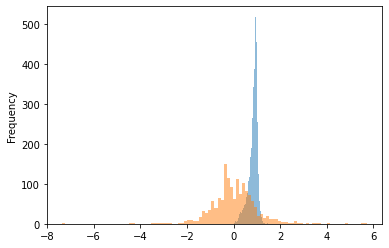

In [27]:
original_train[2].plot.hist(bins=100, alpha=0.5)
test[2].plot.hist(bins=100, alpha=0.5)

<AxesSubplot:ylabel='Frequency'>

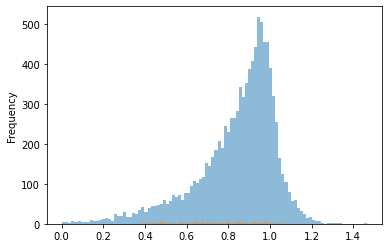

In [32]:
original_train[2].plot.hist(bins=100, alpha=0.5)
test_w_threshold[2].plot.hist(bins=100, alpha=0.5)

In [28]:
pd.merge(
    original_train.drop(1, axis=1).groupby(0).agg(['min', 'mean', 'median', 'max']),
    test.drop(1, axis=1).groupby(0).agg(['min', 'mean', 'median', 'max']),
    right_index=True, left_index=True
)

2_x                      \
                                                  min      mean    median   
0                                                                           
786O_KIDNEY                                  0.761184  0.893911  0.937128   
A498_KIDNEY                                  0.794810  0.957742  0.971588   
A549_LUNG                                    0.791285  0.930193  0.941290   
ACHN_KIDNEY                                  0.746362  0.930892  0.932561   
BT549_BREAST                                 0.202435  0.871923  0.918233   
CAKI1_KIDNEY                                 0.698757  0.876890  0.888354   
COLO205_LARGE_INTESTINE                      0.535846  0.863248  0.946534   
DU145_PROSTATE                               0.440693  0.879886  0.947688   
HCT116_LARGE_INTESTINE                       0.645431  0.866016  0.885615   
HCT15_LARGE_INTESTINE                        0.365745  0.781122  0.878145   
HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE      0.348769  0.808399  0.860062   
HS578T_BREAST                                0.383819  0.722841  0.726358   
HT29_LARGE_INTESTINE                         0.539916  0.932206  0.964321   
IGROV1_OVARY                                 0.603529  0.845912  0.868921   
K562_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE      0.685622  0.848949  0.865920   
KM12_LARGE_INTESTINE                         0.508906  0.828853  0.874459   
LOXIMVI_SKIN                                 0.559386  0.855194  0.904824   
MALME3M_SKIN                                 0.848069  0.958741  0.949732   
MCF7_BREAST                                  0.524954  0.969223  0.997980   
MDAMB231_BREAST                              0.853341  0.935912  0.911274   
MDAMB435S_SKIN                               0.792701  0.983374  0.993968   
MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     0.542103  0.710095  0.684692   
NCIH226_LUNG                                 0.637946  0.893403  0.885412   
NCIH23_LUNG                                  0.535834  0.849265  0.878992   
NCIH322_LUNG                                 0.535775  0.848383  0.934774   
NCIH460_LUNG                                 0.793371  0.942523  0.947334   
NCIH522_LUNG                                 0.309852  0.804867  0.886123   
OVCAR4_OVARY                                 0.467271  0.829319  0.902073   
OVCAR8_OVARY                                 0.300458  0.842282  0.900332   
PC3_PROSTATE                                 0.762851  0.928968  0.951476   
RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  0.509326  0.831338  0.907946   
SF295_CENTRAL_NERVOUS_SYSTEM                 0.592196  0.867891  0.912190   
SKMEL28_SKIN                                 0.784434  0.948762  0.968633   
SKMEL2_SKIN                                  0.874176  0.945617  0.932541   
SKMEL5_SKIN                                  0.727775  0.968705  0.986317   
SKOV3_OVARY                                  0.535781  0.889421  0.899537   
SR786_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     0.467759  0.857748  0.883036   
SW620_LARGE_INTESTINE                        0.466992  0.859316  0.943565   
T47D_BREAST                                  0.773400  0.903561  0.898391   
U251MG_CENTRAL_NERVOUS_SYSTEM                0.450711  0.866187  0.894851   
UACC257_SKIN                                 0.418703  0.850867  0.891745   
UACC62_SKIN                                  0.573468  0.841889  0.914347   

                                                            2_y            \
                                                  max       min      mean   
0                                                                           
786O_KIDNEY                                  1.006040 -1.738899 -0.073765   
A498_KIDNEY                                  1.113543 -1.253171  0.309632   
A549_LUNG                                    1.068328 -1.864006 -0.169002   
ACHN_KIDNEY                                  1.057046 -3.405293  0.089173   
BT549_BREAST                                 

In [29]:
pd.merge(
    original_train.drop(1, axis=1).groupby(0).agg(['min', 'mean', 'median', 'max']),
    test_w_threshold.drop(1, axis=1).groupby(0).agg(['min', 'mean', 'median', 'max']),
    right_index=True, left_index=True
)

2_x                      \
                                                  min      mean    median   
0                                                                           
786O_KIDNEY                                  0.761184  0.893911  0.937128   
A498_KIDNEY                                  0.794810  0.957742  0.971588   
A549_LUNG                                    0.791285  0.930193  0.941290   
ACHN_KIDNEY                                  0.746362  0.930892  0.932561   
BT549_BREAST                                 0.202435  0.871923  0.918233   
CAKI1_KIDNEY                                 0.698757  0.876890  0.888354   
COLO205_LARGE_INTESTINE                      0.535846  0.863248  0.946534   
DU145_PROSTATE                               0.440693  0.879886  0.947688   
HCT116_LARGE_INTESTINE                       0.645431  0.866016  0.885615   
HCT15_LARGE_INTESTINE                        0.365745  0.781122  0.878145   
HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE      0.348769  0.808399  0.860062   
HS578T_BREAST                                0.383819  0.722841  0.726358   
HT29_LARGE_INTESTINE                         0.539916  0.932206  0.964321   
IGROV1_OVARY                                 0.603529  0.845912  0.868921   
K562_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE      0.685622  0.848949  0.865920   
KM12_LARGE_INTESTINE                         0.508906  0.828853  0.874459   
LOXIMVI_SKIN                                 0.559386  0.855194  0.904824   
MCF7_BREAST                                  0.524954  0.969223  0.997980   
MDAMB435S_SKIN                               0.792701  0.983374  0.993968   
MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     0.542103  0.710095  0.684692   
NCIH226_LUNG                                 0.637946  0.893403  0.885412   
NCIH23_LUNG                                  0.535834  0.849265  0.878992   
NCIH322_LUNG                                 0.535775  0.848383  0.934774   
NCIH460_LUNG                                 0.793371  0.942523  0.947334   
NCIH522_LUNG                                 0.309852  0.804867  0.886123   
OVCAR4_OVARY                                 0.467271  0.829319  0.902073   
OVCAR8_OVARY                                 0.300458  0.842282  0.900332   
RPMI8226_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  0.509326  0.831338  0.907946   
SF295_CENTRAL_NERVOUS_SYSTEM                 0.592196  0.867891  0.912190   
SKMEL2_SKIN                                  0.874176  0.945617  0.932541   
SKMEL5_SKIN                                  0.727775  0.968705  0.986317   
SKOV3_OVARY                                  0.535781  0.889421  0.899537   
SR786_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE     0.467759  0.857748  0.883036   
SW620_LARGE_INTESTINE                        0.466992  0.859316  0.943565   
T47D_BREAST                                  0.773400  0.903561  0.898391   
U251MG_CENTRAL_NERVOUS_SYSTEM                0.450711  0.866187  0.894851   
UACC257_SKIN                                 0.418703  0.850867  0.891745   
UACC62_SKIN                                  0.573468  0.841889  0.914347   

                                                            2_y            \
                                                  max       min      mean   
0                                                                           
786O_KIDNEY                                  1.006040  0.924344  0.934962   
A498_KIDNEY                                  1.113543  0.844729  0.966351   
A549_LUNG                                    1.068328  0.936543  0.964679   
ACHN_KIDNEY                                  1.057046  0.804825  0.938659   
BT549_BREAST                                 1.227175  0.454168  0.613785   
CAKI1_KIDNEY                                 0.996825  0.713649  0.829994   
COLO205_LARGE_INTESTINE                      1.038967  0.536547  0.639390   
DU145_PROSTATE                               1.005539  0.441435  0.600629   
HCT116_LARGE_INTESTINE                       